# Modelos no supervizados
El set de datos datos clustering.csv contiene 1000 observaciones simuladas, en la que se poseen 10 atributos numéricos llamadas V1 a V10, además, del atributo y que indica el grupo real de la observación.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar datos
df = pd.read_csv('data/datos_clustering.csv')
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,y
0,0,-4.554889,4.100700,-3.134432,-1.313845,-9.391112,2.519540,1.308041,0.926173,7.067234,3.509057,3
1,1,10.766431,4.114985,-0.145851,6.064239,-4.482858,2.045298,-8.068677,7.231181,-1.361735,-1.031854,2
2,2,8.697494,6.927252,0.081115,8.782801,-6.016109,2.765242,-9.023664,9.352678,-1.699800,-0.519918,2
3,3,7.887380,0.888983,0.613888,6.976301,-11.153522,-5.858364,-12.793676,4.969787,1.399372,6.831188,1
4,4,3.432427,3.062779,0.881139,-0.040477,-4.844429,2.057529,-2.111636,8.952105,10.530478,-2.324382,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   V1          1000 non-null   float64
 2   V2          1000 non-null   float64
 3   V3          1000 non-null   float64
 4   V4          1000 non-null   float64
 5   V5          1000 non-null   float64
 6   V6          1000 non-null   float64
 7   V7          1000 non-null   float64
 8   V8          1000 non-null   float64
 9   V9          1000 non-null   float64
 10  V10         1000 non-null   float64
 11  y           1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [4]:
# Verificar si hay datos faltantes
df.isnull().sum()

Unnamed: 0    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
y             0
dtype: int64

In [5]:
# Shape de los datos
df.shape

(1000, 12)

# Pregunta 1
Realice un análisis de componentes principales seleccione la cantidad de componentes que expliquen al menos el 70% de la variabilidad de los datos.


In [6]:
# Eliminar la columna 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)

In [7]:
# Separar las características del grupo real de observacion
X = df.drop('y', axis=1)  # Datos de características
y = df['y']  # Grupo real de observacion

In [9]:
# Importar StandardScaler para estandarizar los datos
from sklearn.preprocessing import StandardScaler

In [10]:
# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Importar PCA
from sklearn.decomposition import PCA

In [12]:
# Realizar PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

In [13]:
# Determinar el número de componentes para alcanzar al menos el 70% de variabilidad
explained_variance = pca.explained_variance_ratio_
cumulative_variance = 0
num_components = 0

for i, ev in enumerate(explained_variance):
    cumulative_variance += ev
    num_components = i + 1
    if cumulative_variance >= 0.7:
        break

print(f'Se necesitan {num_components} componentes para explicar al menos el 70% de la variabilidad.')

# Reducir la dimensionalidad a estos componentes
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

Se necesitan 3 componentes para explicar al menos el 70% de la variabilidad.


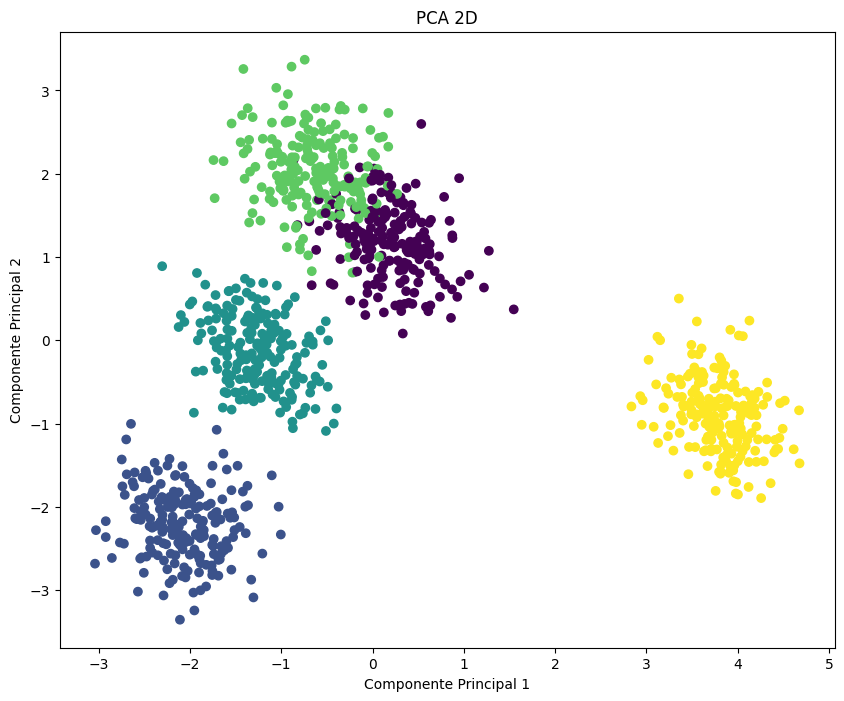

In [19]:
# Graficar pca 2D
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA 2D')
plt.show()

In [14]:
# Porcentaje de varianza acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)


[0.42983331 0.67312072 0.82591348]


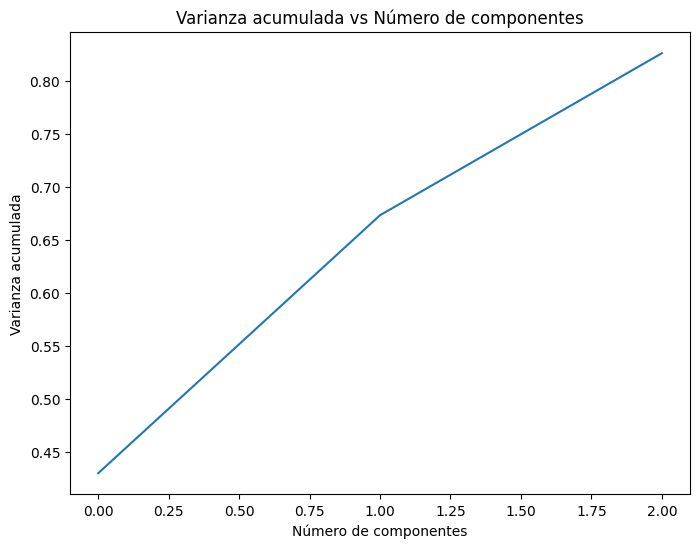

In [15]:
# Grafico varianza acumulada
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza acumulada vs Número de componentes')
plt.show()


# Pregunta 2
Detecte el número optimo de clustering utilizando la información de PCA con la metodología de Elbow y Average silhouette.



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

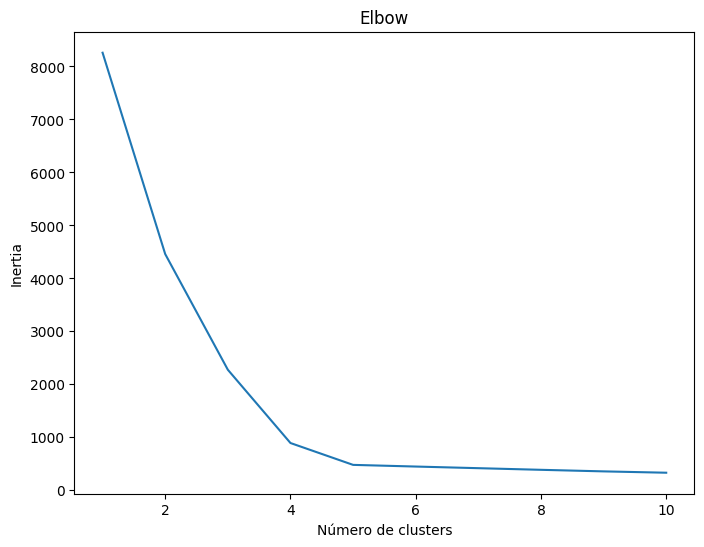

In [23]:
# Detectar el número de clusters de PCA con Elbow y Average Silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_pca)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia)
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.title('Elbow')
plt.show()




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

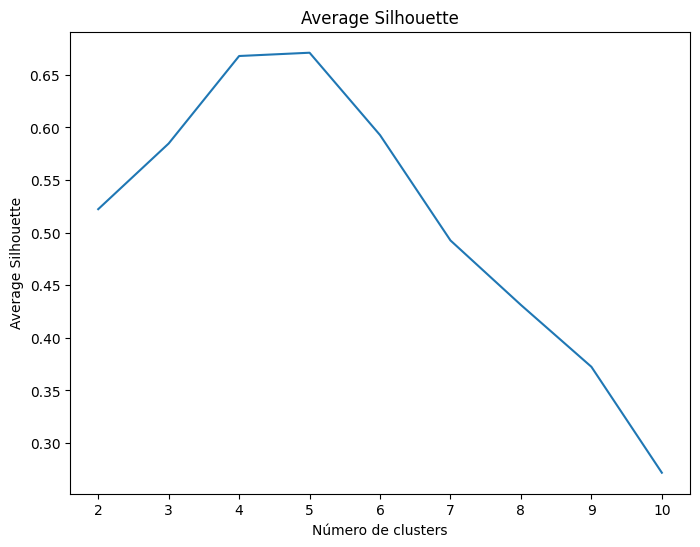

In [24]:
# Average Silhouette
silhouette = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_pca)
    silhouette.append(silhouette_score(X_pca, kmeans.labels_))
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette)
plt.xlabel('Número de clusters')
plt.ylabel('Average Silhouette')
plt.title('Average Silhouette')
plt.show()

# Pregunta 3
Ajuste un clustering de K-means, utilizando las 2 principales componentes principales gráfique los grupos ajustados, qué puede concluir al respecto?

In [ ]:
# Importar KMeans
from sklearn.cluster import KMeans

# Realizar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)